In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
mnist_train=dset.MNIST("",train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test=dset.MNIST("",train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

mnist_train 길이: 60000
mnist_test길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  7


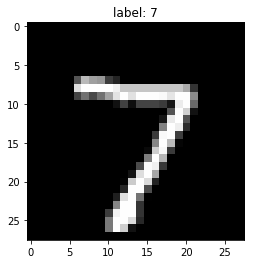

In [13]:
print "mnist_train 길이:",len(mnist_train)
print "mnist_test길이:",len(mnist_test)

image,label=mnist_test.__getitem__(0)
print"image data 형태:",image.size()
print"label: ",label

img=image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [14]:
batch_size=1024
learning_rate=0.01
num_epoch=400

In [20]:
train_loader=torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True,num_workers=2,drop_last=True)
test_loader=torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,shuffle=False,num_workers=2,drop_last=True)

[0]
한 번에 로드되는 데이터 크기: 1024
[1]
한 번에 로드되는 데이터 크기: 1024
[2]
한 번에 로드되는 데이터 크기: 1024
[3]
한 번에 로드되는 데이터 크기: 1024
[4]
한 번에 로드되는 데이터 크기: 1024
[5]
한 번에 로드되는 데이터 크기: 1024


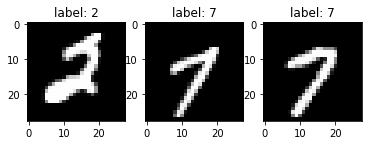

In [23]:
n=3
for i, [imgs, labels] in enumerate(test_loader):
    if i>5:
        break
        
    print "[%d]" %i
    print "한 번에 로드되는 데이터 크기:", len(imgs)
    
    for j in range(n):
        img=imgs[j].numpy()
        img=img.reshape((img.shape[1],img.shape[2]))
        
        plt.subplot(1,n,j+1)
        plt.imshow(img,cmap='gray')
        plt.title("label: %d" %labels[j])
    plt.show

In [25]:
model=nn.Sequential(
    nn.Linear(28*28,256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Linear(128,10),
)

In [39]:
def ComputeAccr(dloader,imodel):
    corrent=0
    total=0
    
    for j,[imgs,labels] in enumerate(dloader):
        img=imgs
        label=Variable(labels)
        
        img=img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        img=img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img=Variable(img, requires_grad=False)
        
        output=imodel(img)
        _, output_index=torch.max(output,1)
        
        total+=label.size(0)
        corrent+=(output_index==label).sum().float()
    print("Accuracy of Test Data:{}".format(100*corrent/total))

In [40]:
ComputeAccr(test_loader,model)

Accuracy of Test Data:11.2955732346


In [43]:
loss_func=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
num_epoch=400
for i in range(num_epoch): 
    for j, [imgs, labels] in enumerate(train_loader): 
        img =imgs 
        label=Variable(labels)
    
        img=img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        img=img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img=Variable(img, requires_grad=True)

        optimizer.zero_grad()
        output=model(img)
        loss=loss_func(output,label)

        loss.backward()
        optimizer.step()

    if i%50==0:
        print("%d.." %i)
        ComputeAccr(test_loader, model)
        print loss

0..
Accuracy of Test Data:82.736541748
tensor(0.6306, grad_fn=<NllLossBackward>)
50..
Accuracy of Test Data:88.661026001
tensor(0.3767, grad_fn=<NllLossBackward>)
100..
Accuracy of Test Data:89.952255249
tensor(0.3692, grad_fn=<NllLossBackward>)
200..
Accuracy of Test Data:91.1458358765
tensor(0.3096, grad_fn=<NllLossBackward>)
250..
Accuracy of Test Data:91.514755249
tensor(0.2562, grad_fn=<NllLossBackward>)
300..
Accuracy of Test Data:91.8402786255
tensor(0.3185, grad_fn=<NllLossBackward>)
350..
Accuracy of Test Data:92.111541748
tensor(0.2873, grad_fn=<NllLossBackward>)


In [53]:
ComputeAccr(test_loader,model)

Accuracy of Test Data:92.3502578735


In [54]:
netname='./nets/mlp_weight.pkl'
torch.save(model,netname, )